# From Joint Discrete Distribution to Percentiles

Often, in solving dynamic heterogeneous agent models, the state and choice spaces are discretized. We obtain as output from solving the model a discrete random variable with a vector of discrete random variable's values and another vector of probabilities. 

But we are often interested in distributional statistics such as percentiles of the distribution. 

If there are multiple outcomes/choices of interest, we might be additionally interested in the joint distribution of outcomes. 

The output discrete random variable vector might be sorted along the dimension of some vector, but not the other variables of interest. 

The function here: 
1. simulates random variables with many draws from joint discrete probability distribution 
2. computes various conditional, marginal, and joint distributional statistics. 

## Program

Graphing Program.

In [75]:
# Graphing Function, Multiple a-axis variables
ff_discrete_to_percentiles <- function(df, x.var,
                                       fill.var,
                                       out.var,
                                       subplot.var,
                                       it.fill.var.show.cnt = 3,
                                       it.subplot.var.show.cnt = 3,
                                       round = 3,
                                       ncol = 3,
                                       geom_type = 'line',
                                       st.caption = '',
                                       bl.lines.axis = FALSE,
                                       bl.lines.45 = FALSE,
                                       print=TRUE){


    return(list(plot=plot))
}

## Load Data

In [76]:
# Library
library(tidyverse)
library(AER)
library(R.matlab)
source('C:/Users/fan/R4Econ/summarize/summ/SummPercentiles.R')

# Load Sample Data
setwd('C:/Users/fan/R4Econ/_data/gda_medium1/pm158/')
vf.matfile <- 'vf_az_p_gb_sa158_c1.mat'
vf.mat.out <- readMat(vf.matfile)

ds.matfile <- 'ds_az_p_gb_sa158_c1.mat'
ds.mat.out <- readMat(ds.matfile)

In [77]:
# str(vf.mat.out)

In [78]:
# str(ds.mat.out)

## Creating Discrete Proability Dataframe

In [79]:
# Vectors of States
ar.a <- vf.mat.out$ar.a
ar.z <- vf.mat.out$ar.z

# Outcome Matrix
mt.pol <- vf.mat.out$mt.pol
mt.val <- vf.mat.out$mt.val
mt.con <- vf.mat.out$mt.cons
mt.inc <- vf.mat.out$mt.incm

# Discrete Distribution
mt.dist <- ds.mat.out$D0

In [80]:
sum(mt.dist)

[1] 1

In [107]:
ar.st.vars <- c('a', 'z')
list.ar.fl <- list(ar.a, ar.z)
list.ts.valpolmat <- tibble(val=as.numeric(mt.pol),
                            pol=as.numeric(mt.val),
                            con=as.numeric(mt.con),
                            inc=as.numeric(mt.inc),
                            prob=as.numeric(mt.dist)) 
df.slds <- ff_dyna_sup_expand_grids(ar.st.vars, list.ar.fl, list.ts.valpolmat)
df.slds <- df.slds %>% mutate(wealth = inc + a,
                              bl.borr = if_else(a < 0, 1, 0))

In [108]:
t(names(df.slds))

a,z,val,pol,con,inc,prob,wealth,bl.borr


In [109]:
summary(df.slds)

       a                z                 val              pol            
 Min.   :-10.00   Min.   : 0.03002   Min.   :-10.00   Min.   :-1000.0000  
 1st Qu.:  3.75   1st Qu.: 0.13452   1st Qu.:  4.88   1st Qu.:   -0.6909  
 Median : 17.50   Median : 0.60287   Median : 18.33   Median :    6.3423  
 Mean   : 17.50   Mean   : 2.27391   Mean   : 18.32   Mean   :   -6.3460  
 3rd Qu.: 31.25   3rd Qu.: 2.70187   3rd Qu.: 31.88   3rd Qu.:    9.4750  
 Max.   : 45.00   Max.   :12.10894   Max.   : 45.00   Max.   :   12.4528  
      con                inc              prob               wealth       
 Min.   : 0.03077   Min.   :-9.999   Min.   :0.000e+00   Min.   :-19.999  
 1st Qu.: 0.97752   1st Qu.: 3.781   1st Qu.:8.975e-06   1st Qu.:  7.556  
 Median : 1.36741   Median :17.558   Median :3.650e-05   Median : 35.111  
 Mean   : 1.51462   Mean   :17.557   Mean   :1.176e-04   Mean   : 35.057  
 3rd Qu.: 1.74906   3rd Qu.:31.335   3rd Qu.:1.373e-04   3rd Qu.: 62.666  
 Max.   :12.41166   Max. 

In [111]:
str(df.slds)

Classes 'tbl_df', 'tbl' and 'data.frame':	8500 obs. of  9 variables:
 $ a      : num  -10 -9.89 -9.78 -9.67 -9.56 ...
 $ z      : num  0.03 0.03 0.03 0.03 0.03 ...
 $ val    : num  -10 -10 -9.89 -10 -9.89 ...
 $ pol    : num  -1000 -1000 -1000 -954 -944 ...
 $ con    : num  0.0308 0.141 0.141 0.3614 0.3614 ...
 $ inc    : num  -10 -9.89 -9.78 -9.67 -9.56 ...
 $ prob   : num  1.36e-05 1.84e-06 2.07e-06 1.56e-06 2.49e-06 ...
 $ wealth : num  -20 -19.8 -19.6 -19.3 -19.1 ...
 $ bl.borr: num  1 1 1 1 1 1 1 1 1 1 ...


In [112]:
sum(df.slds$prob)
sum(df.slds$prob/sum(df.slds$prob))

[1] 1

[1] 1

## Simulate Joint Distribution from Joint Discrete 

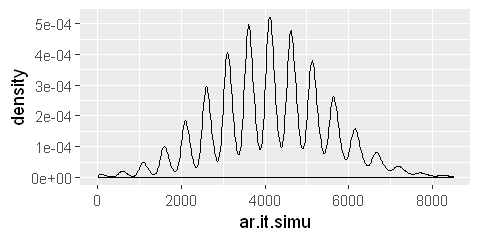

In [113]:
it.sample.draws <- 1000000
ar.it.simu <- sample(dim(df.slds)[1], it.sample.draws, replace = TRUE,
                    prob = (df.slds$prob/sum(df.slds$prob)));
# z = hist(df.slds$, plot=FALSE) 
options(repr.plot.width = 4, repr.plot.height = 2)
tibble(ar.it.simu=ar.it.simu) %>% ggplot(aes(x=ar.it.simu)) + geom_density()

In [114]:
df.sampled <- df.slds[ar.it.simu, ]
dim(df.slds)
dim(df.sampled)

[1] 8500    9

[1] 1000000       9

## Unconditional Distribution

In [115]:
f.summ.percentiles(df.sampled) %>% mutate_if(is.numeric, round, 2)

Warning message:
"attributes are not identical across measure variables;
they will be dropped"

var,n,NAobs,mean,sd,min,p1,p5,p25,p50,p75,p95,p99,max
a,1e+06,0,6.69,10.89,-1e+01,-7.91,-6.03,-1.40,4.00,12.15,29.24,41.25,45.00
bl.borr,1e+06,0,0.32,0.47,0e+00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
con,1e+06,0,1.03,0.49,3e-02,0.36,0.47,0.73,0.97,1.23,1.75,2.34,12.41
inc,1e+06,0,6.71,10.90,-1e+01,-7.90,-6.02,-1.40,4.01,12.20,29.25,41.30,45.30
pol,1e+06,0,-7.93,34.32,-1e+03,-92.94,-37.10,-11.08,-2.15,3.77,9.13,11.16,12.45
prob,1e+06,0,0.00,0.00,0e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
val,1e+06,0,6.69,10.90,-1e+01,-7.91,-6.03,-1.40,4.00,12.15,29.24,41.25,45.00
wealth,1e+06,0,13.40,21.80,-2e+01,-15.81,-12.05,-2.80,8.01,24.34,58.48,82.54,90.30
z,1e+06,0,1.00,1.25,3e-02,0.06,0.13,0.28,0.60,1.28,2.70,5.72,12.11


## Conditional Distribution

conditional on wealth

In [116]:
# Cut Wealth Distribution
ar.fl.wealth.cuts <- (hist(df.sampled$wealth, breaks = 10, plot = FALSE))$breaks
df.sampled <- df.sampled %>% mutate(wealth_grp = cut(wealth, ar.fl.wealth.cuts))

In [117]:
# Group by Statistics
df <- df.sampled
vars.group.by = c('wealth_grp')
transpose = FALSE
fmt_mean = '%.1f'
fmt_sd = '%.1f'

df.wealth.cut <- df %>% 
            arrange(!!!syms(vars.group.by)) %>% 
                    group_by(!!!syms(vars.group.by)) %>% 
                    do(data.frame(f.summ.percentiles(.)))

Warning message:
"attributes are not identical across measure variables;
they will be dropped"Warning message:
"attributes are not identical across measure variables;
they will be dropped"Warning message:
"attributes are not identical across measure variables;
they will be dropped"Warning message:
"attributes are not identical across measure variables;
they will be dropped"Warning message:
"attributes are not identical across measure variables;
they will be dropped"Warning message:
"attributes are not identical across measure variables;
they will be dropped"Warning message:
"attributes are not identical across measure variables;
they will be dropped"Warning message:
"attributes are not identical across measure variables;
they will be dropped"Warning message:
"attributes are not identical across measure variables;
they will be dropped"Warning message:
"attributes are not identical across measure variables;
they will be dropped"Warning message:
"attributes are not identical across measur

In [118]:
df.wealth.cut

wealth_grp,var,n,NAobs,mean,sd,min,p1,p5,p25,p50,p75,p95,p99,max
"(-20,-10]",a,85498,0,-6.470841e+00,1.124455e+00,-1.000000e+01,-9.889780e+00,-8.677355e+00,-7.134269e+00,-6.252505e+00,-5.591182e+00,-5.150301e+00,-5.040080e+00,-5.040080e+00
"(-20,-10]",bl.borr,85498,0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
"(-20,-10]",con,85498,0,4.890423e-01,1.450073e-01,3.076543e-02,2.652043e-01,3.108362e-01,4.021147e-01,4.582158e-01,5.349241e-01,7.570771e-01,1.005888e+00,2.271379e+00
"(-20,-10]",inc,85498,0,-6.457869e+00,1.126289e+00,-9.999250e+00,-9.879421e+00,-8.666996e+00,-7.129375e+00,-6.242146e+00,-5.569253e+00,-5.103876e+00,-5.018151e+00,-4.972533e+00
"(-20,-10]",pol,85498,0,-6.208043e+01,9.802054e+01,-1.000000e+03,-5.217440e+02,-1.608476e+02,-5.948403e+01,-3.982648e+01,-2.760122e+01,-1.457892e+01,-7.223870e+00,6.348400e+00
"(-20,-10]",prob,85498,0,3.412235e-04,1.989527e-04,3.972822e-08,1.378942e-05,3.729527e-05,1.668263e-04,3.298612e-04,5.263711e-04,6.507110e-04,7.006788e-04,7.272769e-04
"(-20,-10]",val,85498,0,-6.428043e+00,1.201360e+00,-1.000000e+01,-9.889780e+00,-8.677355e+00,-7.134269e+00,-6.252505e+00,-5.591182e+00,-4.819639e+00,-4.048096e+00,4.659319e+00
"(-20,-10]",wealth,85498,0,-1.292871e+01,2.250706e+00,-1.999925e+01,-1.976920e+01,-1.734435e+01,-1.426364e+01,-1.249465e+01,-1.116044e+01,-1.025418e+01,-1.005823e+01,-1.001261e+01
"(-20,-10]",z,85498,0,5.188681e-01,5.335610e-01,3.001505e-02,4.367164e-02,9.245287e-02,1.957227e-01,4.143450e-01,6.028684e-01,1.276272e+00,2.701869e+00,1.210894e+01
"(-10,0]",a,235722,0,-2.415849e+00,1.407137e+00,-5.150301e+00,-4.929860e+00,-4.709419e+00,-3.607214e+00,-2.394790e+00,-1.182365e+00,-3.006012e-01,-8.016032e-02,-8.016032e-02


In [90]:
ar.st.vars <- c('a', 'z')
list.ar.fl <- list(ar.a, ar.z)
list.ts.valpolmat <- tibble(val=as.numeric(mt.val), pol=as.numeric(mt.pol))
df.solu <- ff_dyna_sup_expand_grids(ar.st.vars, list.ar.fl, list.ts.valpolmat)

options(repr.matrix.max.rows=500, repr.matrix.max.cols=20)
options(repr.plot.width = 10, repr.plot.height = 4)
plot <- ff_dyna_sup_grid_out_graph(df=df.solu, x.var='a', fill.var='z', out.var='val', it.fill.var.show.cnt=5)
options(repr.plot.width = 10, repr.plot.height = 4)
plot <- ff_dyna_sup_grid_out_graph(df=df.solu, x.var='a', fill.var='z', out.var='pol', it.fill.var.show.cnt=5)

ERROR: Error in ff_dyna_sup_grid_out_graph(df = df.solu, x.var = "a", fill.var = "z", : could not find function "ff_dyna_sup_grid_out_graph"
